In [1]:
import sys
sys.path.append("..") # Adds higher directory to python modules path.

from early_text_classifier import EarlyTextClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')

In [2]:
etc_kwargs = {'dataset_path': '/home/juan/Estudios/Codigo Fuente/earlyClassification/dataset/raw/cachopo',
              'dataset_name': 'r8-all-terms-clean',
#              'dataset_name': '20ng-stemmed',
              'initial_step': 1,
              'step_size': 10}
preprocess_kwargs = {'min_word_length': 2,
                     'max_number_words': 1000}
cpi_model_params = dict()
cpi_model_params['alpha'] = 1.0
cpi_model_params['binarize'] = 0.0
cpi_model_params['fit_prior'] = False
cpi_kwargs = {'train_dataset_percentage': 0.75,
              'test_dataset_percentage': 0.25,
              'doc_rep': 'term_frec',
              'model_type': 'BernoulliNB',
              'cpi_model_params': cpi_model_params}
context_kwargs = {'number_most_common': 25}
dmc_model_params = dict()
dmc_model_params['C'] = 2
dmc_model_params['solver'] = 'liblinear'
dmc_model_params['n_jobs'] = 1
dmc_model_params['random_state'] = 0
dmc_kwargs = {'train_dataset_percentage': 0.75,
              'test_dataset_percentage': 0.25,
              'model_type': 'LogisticRegression',
              'dmc_model_params': dmc_model_params}

etc = EarlyTextClassifier(etc_kwargs, preprocess_kwargs, cpi_kwargs, context_kwargs, dmc_kwargs)

Model already trained. Loading it.


In [3]:
etc.print_params_information()

Dataset name: r8-all-terms-clean
Dataset path: /home/juan/Estudios/Codigo Fuente/earlyClassification/dataset/raw/cachopo
--------------------------------------------------------------------------------
Pre-process params:
{'max_number_words': 1000, 'min_word_length': 2}
--------------------------------------------------------------------------------
CPI params:
{'cpi_model_params': {'alpha': 1.0, 'binarize': 0.0, 'fit_prior': False},
 'doc_rep': 'term_frec',
 'initial_step': 1,
 'model_type': 'BernoulliNB',
 'step_size': 10,
 'test_dataset_percentage': 0.25,
 'train_dataset_percentage': 0.75}
--------------------------------------------------------------------------------
Context Information params:
{'initial_step': 1, 'number_most_common': 25, 'step_size': 10}
--------------------------------------------------------------------------------
DMC params:
{'dmc_model_params': {'C': 2,
                      'n_jobs': 1,
                      'random_state': 0,
                      'solver

In [4]:
Xtrain, ytrain, Xtest, ytest = etc.preprocess_dataset()
etc.fit(Xtrain, ytrain)

Pre-processing dataset
Building dictionary
555039  total words  19956  unique words
Considering only 1000 unique terms
Xtrain.shape: (5485, 965)
ytrain.shape: (5485,)
Xtest.shape: (2189, 842)
ytest.shape: (2189,)
EarlyTextClassifier model already trained


In [5]:
cpi_percentages, cpi_predictions, dmc_prediction, prediction_time, dmc_ytest = etc.predict(Xtest, ytest)

Predicting with the EarlyTextClassifier model
Predicting with PartialInformationClassifier
cpi_partial[i]_Xtest_representation.shape: (2189, 1001)
******************************
Accuracy of CPI for each percentage:
1 % --> 0.495
11 % --> 0.538
21 % --> 0.615
31 % --> 0.704
41 % --> 0.77
51 % --> 0.809
61 % --> 0.832
71 % --> 0.844
81 % --> 0.847
91 % --> 0.852
******************************
Generating DecisionClassifier dataset
Predicting with DecisionClassifier
******************************
Accuracy of DMC for each percentage:
1 % --> 0.0728
11 % --> 0.0558
21 % --> 0.0609
31 % --> 0.0694
41 % --> 0.0755
51 % --> 0.0798
61 % --> 0.0821
71 % --> 0.083
81 % --> 0.0831
91 % --> 0.0831
******************************


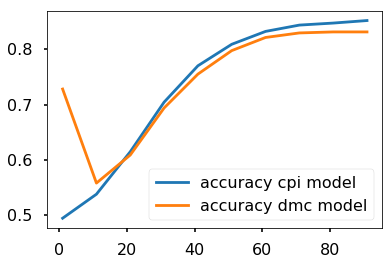

In [7]:
num_steps = len(cpi_percentages)
x = cpi_percentages
accuracy_cpi = np.sum(cpi_predictions == ytest, axis=1) / ytest.size
y_cpi = np.zeros(num_steps)
y_dmc = np.zeros(num_steps)
for idx in range(num_steps):
    y_cpi[idx] = np.sum(cpi_predictions[idx] == ytest) / ytest.size
    y_dmc[idx] = np.sum(dmc_prediction[idx] == dmc_ytest[idx]) / dmc_ytest[idx].size

plt.plot(x, y_cpi, label='accuracy cpi model')
plt.plot(x, y_dmc, label='accuracy dmc model')
plt.legend();

In [8]:
penalization_type = 'Losada-Crestani'
time_threshold = 30
costs = {'c_tp': 1.0,
         'c_fn': 1.0,
         'c_fp': 1.0}

etc.score(ytest, cpi_predictions, cpi_percentages, prediction_time, penalization_type, time_threshold, costs)

Score ETC:
------------------------------
Precision: 0.557
Recall: 0.557
F1 Measure: 0.557
Accuracy: 0.557
ERDE o=30: 0.446
Confusion matrix:
array([[  75,    0,  617,    2,    1,    0,    0,    1],
       [   8,   25,   86,    0,    1,    0,    0,    1],
       [   4,    0, 1078,    1,    0,    0,    0,    0],
       [   0,    0,    7,    0,    1,    0,    2,    0],
       [   0,    0,   60,    1,   16,    4,    0,    0],
       [   0,    0,   64,    0,   13,   10,    0,    0],
       [   1,    0,   27,    0,    5,    0,    3,    0],
       [   2,    0,   38,    0,   21,    0,    1,   13]])
             precision    recall  f1-score   support

        acq       0.83      0.11      0.19       696
      crude       1.00      0.21      0.34       121
       earn       0.55      1.00      0.70      1083
      grain       0.00      0.00      0.00        10
   interest       0.28      0.20      0.23        81
   money-fx       0.71      0.11      0.20        87
       ship       0.50      0

In [9]:
etc.save_model()